In [1]:
import os,glob
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Lipinski

In [2]:
resultsFolder = '/home/ychen/projects/nps_ringsys/20210901_analysis/'

npRings_noStereo = PandasTools.LoadSDF(resultsFolder+'npRings_noStereo.sdf')
npRings_Stereo = PandasTools.LoadSDF(resultsFolder+'npRings_Stereo.sdf')

scRings_noStereo = PandasTools.LoadSDF(resultsFolder+'zincRings_noStereo.sdf')
scRings_Stereo = PandasTools.LoadSDF(resultsFolder+'zincRings_Stereo.sdf')

,ringSmiles_noStereo,nMol_conID,pMol_conID,ID,ROMol
0,c1ccccc1,72297,31.31%,4,
1,C1CCOCC1,44113,19.10%,22,
2,O=c1ccoc2ccccc12,8879,3.85%,44,
3,C1CCOC1,7178,3.11%,18,
4,C1CCCCC1,6616,2.87%,54,
...,...,...,...,...,...
30998,O=C1C=CC=CC2C(C=CC=CC=CCCNC(=O)C1)C=CC1C(=O)CC...,1,0.00%,9131,
30999,O=C1C2C=CC3C=CCCCCCCC=CC=CC=CC3C2C2CCCN12,1,0.00%,9130,
31000,O=C1C=CC2CC(=O)CC2CC1,1,0.00%,9128,
31001,C1=CC2CCCCC3OC23CC1,1,0.00%,9127,

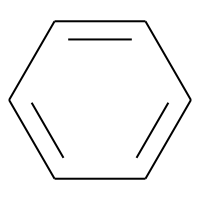
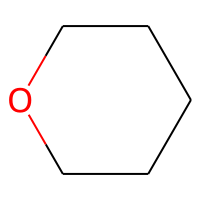
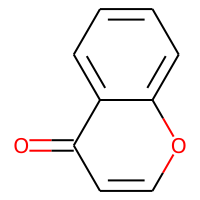
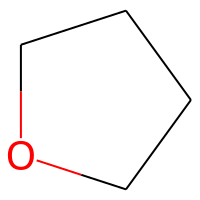
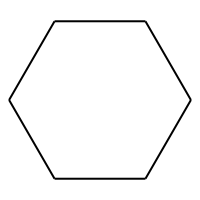
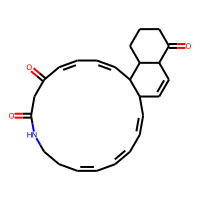
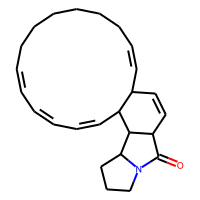
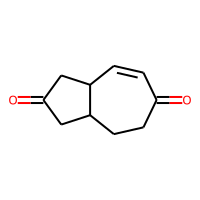
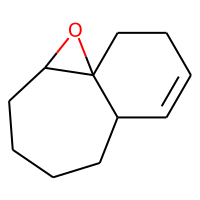
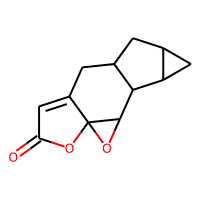

In [3]:
npRings_noStereo

In [4]:
def get_molecule_composition(mol, requestedAtomicNum):
    '''
    Counts the number of atoms of a given element in the ring system

    :param mol: the ring system molecule
    :param requestedAtomicNum: atomic number of the element for which the occurrence should be counted
    :return: the number of atoms of an element
    '''
    counter = 0
    for atom in mol.GetAtoms():
        atomicNum = atom.GetAtomicNum()
        if atomicNum == requestedAtomicNum:
            counter += 1
    return counter

In [5]:
def num_aromatic_atoms(mol):
    numAromaticAtoms = 0
    for atom in mol.GetAtoms():
        if atom.GetIsAromatic():
            numAromaticAtoms += 1
    return numAromaticAtoms

In [7]:
def num_aromatic_heteroatoms(mol):
    numAromaticAtoms = 0
    for atom in mol.GetAtoms():
        if atom.GetIsAromatic() and atom.GetAtomicNum() !=6:
            numAromaticAtoms += 1
    return numAromaticAtoms

In [8]:
def get_nof_chiral_centers(mol):
    return len(Chem.FindMolChiralCenters(mol, includeUnassigned=True))

In [9]:
def cal_properties(df):
    df['N'] = df['ROMol'].apply(get_molecule_composition, args=(7,))
    df['O'] = df['ROMol'].apply(get_molecule_composition, args=(8,))
    df['H'] = df['ROMol'].apply(get_molecule_composition, args=(1,))
    df['B'] = df['ROMol'].apply(get_molecule_composition, args=(5,))
    df['C'] = df['ROMol'].apply(get_molecule_composition, args=(6,))
    df['F'] = df['ROMol'].apply(get_molecule_composition, args=(9,))
    df['Si'] = df['ROMol'].apply(get_molecule_composition, args=(14,))
    df['P'] = df['ROMol'].apply(get_molecule_composition, args=(15,))
    df['S'] = df['ROMol'].apply(get_molecule_composition, args=(16,))
    df['Cl'] = df['ROMol'].apply(get_molecule_composition, args=(17,))
    df['Se'] = df['ROMol'].apply(get_molecule_composition, args=(34,))
    df['Br'] = df['ROMol'].apply(get_molecule_composition, args=(35,))
    df['I'] = df['ROMol'].apply(get_molecule_composition, args=(53,))
    
    df['a_aro'] = df['ROMol'].apply(num_aromatic_atoms)

    df['a_heteroaro'] = df['ROMol'].apply(num_aromatic_heteroatoms)

    df['chiral'] = df['ROMol'].apply(get_nof_chiral_centers)

    df['element_except_C'] = df['N'] + df['O'] + df['B'] + \
    df['F'] + df['Si'] + df['P'] + df['S'] +\
    df['Cl'] + df['Se'] + df['Br'] + df['I']

    df['element_except_C_O'] = df['N'] + df['B'] + \
    df['F'] + df['Si'] + df['P'] + df['S'] +\
    df['Cl'] + df['Se'] + df['Br'] + df['I']

    df['element_except_C_N'] = df['O'] + df['B'] + \
    df['F'] + df['Si'] + df['P'] + df['S'] +\
    df['Cl'] + df['Se'] + df['Br'] + df['I']

    df['halogens'] = df['F'] + df['Cl'] + \
    df['Br'] + df['I']

    df['has_C=C'] = df.apply(lambda row:row.ROMol.HasSubstructMatch(Chem.MolFromSmarts('C=C')),axis=1)
    
    return df

,RingSmiles,nMol_stereoID,pMol_stereoID,ID,ROMol,N,O,H,B,C,...,Br,I,a_aro,a_heteroaro,chiral,element_except_C,element_except_C_O,element_except_C_N,halogens,has_C=C
0,c1ccccc1,77523,30.60%,p1_10,,0,0,0,0,6,...,0,0,6,0,0,0,0,0,0,False
1,C1CCOCC1,49694,19.61%,p1_67,,0,1,0,0,5,...,0,0,0,0,0,1,0,1,0,False
2,O=c1ccoc2ccccc12,9983,3.94%,p1_147,,0,2,0,0,9,...,0,0,10,1,0,2,0,2,0,False
3,C1CCOC1,8237,3.25%,p1_63,,0,1,0,0,4,...,0,0,0,0,0,1,0,1,0,False
4,C1CCCCC1,6974,2.75%,p1_161,,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38657,C=C1CC[C@@H]2[C@@H]1CC[C@@H]1[C@H]3CCC(=O)C[C@...,1,0.00%,p7_218,,0,1,0,0,18,...,0,0,0,0,6,1,0,1,0,True
38658,O=C1Nc2cc3cc4c(cc3c3c5c(cc(c23)C1=O)OCO5)OCO4,1,0.00%,p186_124,,1,6,0,0,18,...,0,0,14,0,0,7,1,6,0,False
38659,O=C1CNCC=CN1,1,0.00%,p186_126,,2,1,0,0,5,...,0,0,0,0,0,3,2,1,0,True
38660,O=C1CN=CCN=CCNC(=O)CN=CCN=CCN1,1,0.00%,p186_127,,6,2,0,0,12,...,0,0,0,0,0,8,6,2,0,False

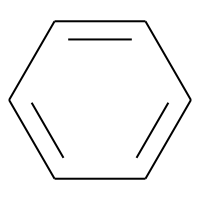
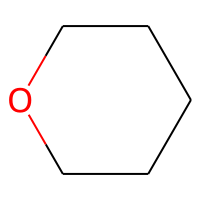
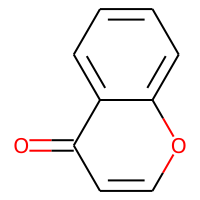
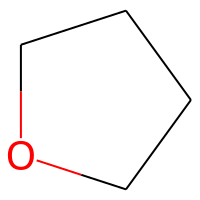
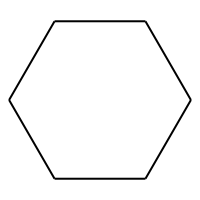
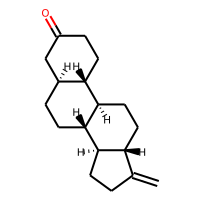
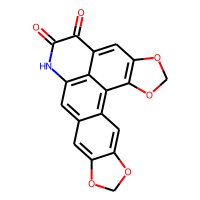
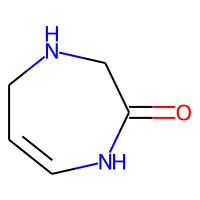
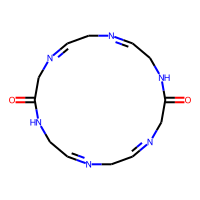
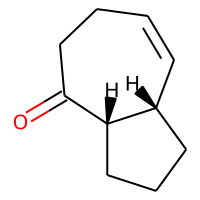

In [10]:
cal_properties(npRings_noStereo)
cal_properties(npRings_Stereo)

In [11]:
list_np_noStereo = [npRings_noStereo.head(30),npRings_noStereo.head(100),npRings_noStereo]
list_np_Stereo = [npRings_Stereo.head(30),npRings_Stereo.head(100),npRings_Stereo]

In [12]:
for df1,df2,top in zip(list_np_noStereo,list_np_Stereo,['top-30','top-100','all']):
    print(top)
    print(len(df1[df1['element_except_C'] ==0]),'/',len(df2[df2['element_except_C'] ==0]))
    print(len(df1[df1['element_except_C_O'] ==0]),'/',len(df2[df2['element_except_C_O'] ==0]))
    print(len(df1[df1['O'] !=0]),'/',len(df2[df2['O'] !=0]))
    print(len(df1[df1['element_except_C_N'] ==0]),'/',len(df2[df2['element_except_C_N'] ==0]))
    print(len(df1[df1['N'] !=0]),'/',len(df2[df2['N'] !=0]))
    print(len(df1[df1['S'] !=0]),'/',len(df2[df2['S'] !=0]))
    print(len(df1[df1['halogens'] !=0]),'/',len(df2[df2['halogens'] !=0]))
    print(len(df1[df1['a_aro'] !=0]),'/',len(df2[df2['a_aro'] !=0]))
    print(len(df1[df1['a_heteroaro'] !=0]),'/',len(df2[df2['a_heteroaro'] !=0]))
    print(len(df1[df1['chiral'] !=0]),'/',len(df2[df2['chiral'] !=0]))
    print(len(df1[df1['has_C=C'] ==True]),'/',len(df2[df2['has_C=C'] ==True]))

top-30
9 / 7
24 / 24
15 / 17
15 / 13
6 / 6
0 / 0
0 / 0
16 / 16
9 / 9
4 / 2
5 / 5
top-100
29 / 28
75 / 75
52 / 55
46 / 43
24 / 24
2 / 2
0 / 0
41 / 49
23 / 28
30 / 13
38 / 29
all
2172 / 3240
19347 / 25255
26233 / 32467
4431 / 5852
11260 / 13001
1887 / 1976
1 / 1
12733 / 14359
5401 / 5957
24417 / 32063
19607 / 24611


In [13]:
for df1,df2,top,num in zip(list_np_noStereo,list_np_Stereo,['top-30','top-100','all'],[[30,30],[100,100],[31003,38662]]):
    print(top)
    print('{:0.2f}'.format(len(df1[df1['element_except_C'] ==0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['element_except_C'] ==0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['element_except_C_O'] ==0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['element_except_C_O'] ==0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['O'] !=0])/num[0]),'/','{:0.2f}'.format(len(df2[df2['O'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['element_except_C_N'] ==0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['element_except_C_N'] ==0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['N'] !=0])/num[0]),'/','{:0.2f}'.format(len(df2[df2['N'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['S'] !=0])/num[0]),'/','{:0.2f}'.format(len(df2[df2['S'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['halogens'] !=0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['halogens'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['a_aro'] !=0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['a_aro'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['a_heteroaro'] !=0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['a_heteroaro'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['chiral'] !=0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['chiral'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['has_C=C'] ==True])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['has_C=C'] ==True])/num[1]))

top-30
0.30 / 0.23
0.80 / 0.80
0.50 / 0.57
0.50 / 0.43
0.20 / 0.20
0.00 / 0.00
0.00 / 0.00
0.53 / 0.53
0.30 / 0.30
0.13 / 0.07
0.17 / 0.17
top-100
0.29 / 0.28
0.75 / 0.75
0.52 / 0.55
0.46 / 0.43
0.24 / 0.24
0.02 / 0.02
0.00 / 0.00
0.41 / 0.49
0.23 / 0.28
0.30 / 0.13
0.38 / 0.29
all
0.07 / 0.08
0.62 / 0.65
0.85 / 0.84
0.14 / 0.15
0.36 / 0.34
0.06 / 0.05
0.00 / 0.00
0.41 / 0.37
0.17 / 0.15
0.79 / 0.83
0.63 / 0.64


,RingSmiles,nMol_stereoID,pMol_stereoID,ID,ROMol,N,O,H,B,C,...,Br,I,a_aro,a_heteroaro,chiral,element_except_C,element_except_C_O,element_except_C_N,halogens,has_C=C
0,c1ccccc1,6541981,74.84%,p1_3,,0,0,0,0,6,...,0,0,6,0,0,0,0,0,0,False
1,C1CCNCC1,917690,10.50%,p1_4,,1,0,0,0,5,...,0,0,0,0,0,1,1,0,0,False
2,c1ccncc1,764020,8.74%,p1_6,,1,0,0,0,5,...,0,0,6,1,0,1,1,0,0,False
3,c1cn[nH]c1,496192,5.68%,p1_32,,2,0,0,0,3,...,0,0,5,2,0,2,2,0,0,False
4,C1CNCCN1,410872,4.70%,p1_5,,2,0,0,0,4,...,0,0,0,0,0,2,2,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53224,O=C1N[C@H]2Cc3ccccc3C[C@@H]12,1,0.00%,p71_418,,1,1,0,0,11,...,0,0,6,0,2,2,1,1,0,False
53225,O=C1N[C@@H]2Cc3ccccc3C[C@@H]12,1,0.00%,p71_417,,1,1,0,0,11,...,0,0,6,0,2,2,1,1,0,False
53226,O=C1N[C@H]2Cc3ccccc3[C@@H](C2)O1,1,0.00%,p71_416,,1,2,0,0,11,...,0,0,6,0,2,3,1,2,0,False
53227,O=C1N[C@@H]2Cc3ccccc3[C@H](C2)O1,1,0.00%,p71_415,,1,2,0,0,11,...,0,0,6,0,2,3,1,2,0,False

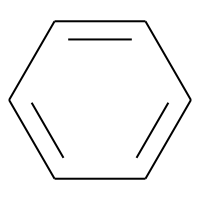
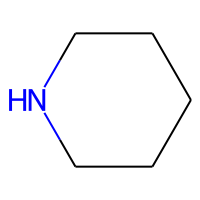
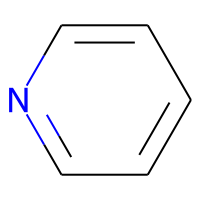
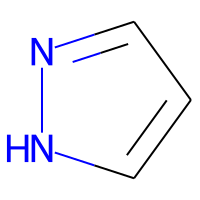
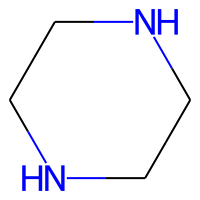
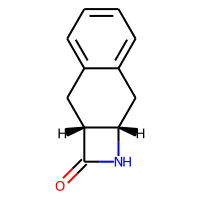
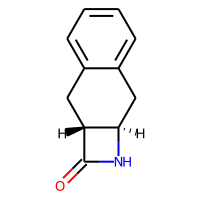
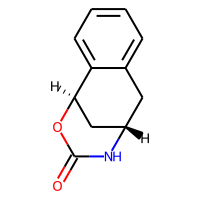
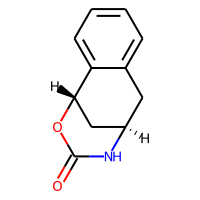
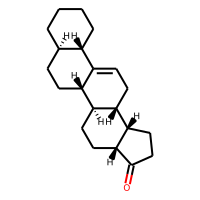

In [14]:
cal_properties(scRings_noStereo)
cal_properties(scRings_Stereo)

In [15]:
list_sc_noStereo = [scRings_noStereo.head(30),scRings_noStereo.head(100),scRings_noStereo]
list_sc_Stereo = [scRings_Stereo.head(30),scRings_Stereo.head(100),scRings_Stereo]

In [16]:
for df1,df2,top in zip(list_sc_noStereo,list_sc_Stereo,['top-30','top-100','all']):
    print(top)
    print(len(df1[df1['element_except_C'] ==0]),'/',len(df2[df2['element_except_C'] ==0]))
    print(len(df1[df1['element_except_C_O'] ==0]),'/',len(df2[df2['element_except_C_O'] ==0]))
    print(len(df1[df1['O'] !=0]),'/',len(df2[df2['O'] !=0]))
    print(len(df1[df1['element_except_C_N'] ==0]),'/',len(df2[df2['element_except_C_N'] ==0]))
    print(len(df1[df1['N'] !=0]),'/',len(df2[df2['N'] !=0]))
    print(len(df1[df1['S'] !=0]),'/',len(df2[df2['S'] !=0]))
    print(len(df1[df1['halogens'] !=0]),'/',len(df2[df2['halogens'] !=0]))
    print(len(df1[df1['a_aro'] !=0]),'/',len(df2[df2['a_aro'] !=0]))
    print(len(df1[df1['a_heteroaro'] !=0]),'/',len(df2[df2['a_heteroaro'] !=0]))
    print(len(df1[df1['chiral'] !=0]),'/',len(df2[df2['chiral'] !=0]))
    print(len(df1[df1['has_C=C'] ==True]),'/',len(df2[df2['has_C=C'] ==True]))

top-30
5 / 5
7 / 8
8 / 8
18 / 18
22 / 21
5 / 4
0 / 0
21 / 21
18 / 18
0 / 0
1 / 0
top-100
11 / 12
21 / 22
44 / 46
46 / 44
75 / 74
17 / 17
0 / 0
65 / 64
53 / 50
0 / 0
13 / 13
all
1447 / 4523
6044 / 16708
19856 / 36076
7258 / 13214
22572 / 34000
7029 / 9540
7 / 10
18667 / 25984
12534 / 14923
10269 / 33053
7773 / 16953


In [17]:
for df1,df2,top,num in zip(list_sc_noStereo,list_sc_Stereo,['top-30','top-100','all'],[[30,30],[100,100],[30265,53229]]):
    print(top)
    print('{:0.2f}'.format(len(df1[df1['element_except_C'] ==0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['element_except_C'] ==0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['element_except_C_O'] ==0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['element_except_C_O'] ==0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['O'] !=0])/num[0]),'/','{:0.2f}'.format(len(df2[df2['O'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['element_except_C_N'] ==0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['element_except_C_N'] ==0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['N'] !=0])/num[0]),'/','{:0.2f}'.format(len(df2[df2['N'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['S'] !=0])/num[0]),'/','{:0.2f}'.format(len(df2[df2['S'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['halogens'] !=0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['halogens'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['a_aro'] !=0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['a_aro'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['a_heteroaro'] !=0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['a_heteroaro'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['chiral'] !=0])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['chiral'] !=0])/num[1]))
    print('{:0.2f}'.format(len(df1[df1['has_C=C'] ==True])/num[0]),'/',
          '{:0.2f}'.format(len(df2[df2['has_C=C'] ==True])/num[1]))

top-30
0.17 / 0.17
0.23 / 0.27
0.27 / 0.27
0.60 / 0.60
0.73 / 0.70
0.17 / 0.13
0.00 / 0.00
0.70 / 0.70
0.60 / 0.60
0.00 / 0.00
0.03 / 0.00
top-100
0.11 / 0.12
0.21 / 0.22
0.44 / 0.46
0.46 / 0.44
0.75 / 0.74
0.17 / 0.17
0.00 / 0.00
0.65 / 0.64
0.53 / 0.50
0.00 / 0.00
0.13 / 0.13
all
0.05 / 0.08
0.20 / 0.31
0.66 / 0.68
0.24 / 0.25
0.75 / 0.64
0.23 / 0.18
0.00 / 0.00
0.62 / 0.49
0.41 / 0.28
0.34 / 0.62
0.26 / 0.32
